# CSE428 Week 3 Coding Assignment

In [14]:
NAME = "Md. Minhajul Islam"
ID = "19101111"
COLLABORATORS_ID = ["", ""]

This assignment contains 4 tasks. Complete the notebook with proper codes for the lines with `# TO-BE-COMPLETED` tag, or by *uncommenting* a partially written codes where necessary.

Background: We larned in class that linear spatial filtering is basically a signal correlation opration between an image and a filter kernel. To filter an ```image``` with a ```kernel``` all we need to do is call the ```signal.correlate``` function from the ```scipy``` library.

```
filtered_image = signal.correlate(image, kernel, mode='same', method='auto')
```
Here, ```mode="same"``` takes care of the image padding under the hood; making the filtered image the *same shape* as the input image, while ```mode="valid"``` *shrinks the filtered image*. The ```method='direct'``` implements the correlation from the definition of signal correlation:

> $g(x, y)=\sum_{s,t}{w(s, t)}f(x+s, y+t)$

whereas ```method='fft'``` uses a frequency domain implementation which we will learn next week. The ```method='auto'``` chooses the faster implementation automatically. <br>
(Except for **Task 1**, always use ```method='auto'``` while using the correlation function )


 

We use the following code stucture to measure the excecution time of some python code:

```
import time

start_time = time.clock()

# some python code   

print("Time elapsed: ", time.clock() - start_time, "seconds")
```


## **Task 0: The Imports** <br>
### Import the necessary libraries and define the helper functions. You can use the helper functions from the coding tutorials, or you can even use your own version of helper functions. <br>


In [82]:
#@title
# Import libraries 
import numpy as np
import skimage as sk
import matplotlib.pyplot  as plt
from scipy import signal
import scipy.stats as st
from skimage import color

In [41]:
# Define helper functions
def im_dimension_show(img):
  print("Dimention: \n(H x W) = " + str(img.shape[0]) +" x " + str(img.shape[1]))

#scipy.signal.gaussian(M, std, sym=True)
def gaussian_kernel(width=1, size=10):
    gaussian1dkernel = signal.gaussian(size, width).reshape(size, 1)
    kernel = np.outer(gaussian1dkernel, gaussian1dkernel)
    return kernel/np.sum(kernel)


## **Task 1: Execution Time** <br>
### Excecution time comparison for the 2 different methods of the correlation function <br>


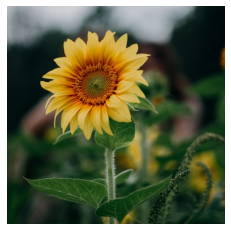

Dimention: 
(H x W) = 512 x 512


In [38]:
#@title
 # Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.
image = None # TO-BE-COMPLETED 

image = sk.io.imread("sample.jpeg")
plt.imshow(image)

plt.axis("off")
plt.show()

im_dimension_show(image)

In [40]:
# Define a gaussian kernel of size (35, 35)

kernel = None # TO-BE-COMPLETED
kernel = gaussian_kernel(35,35)

In [72]:
# Determine the time to filter the image with the kernel using "direct" method

import time
 
#start_time = time.clock()
#skimage pad is removies 
filetred_image_direct = None # TO-BE-COMPLETED
#Return an array of zeros with the same shape and type as a given array
image_zeros = np.zeros_like(image)
for i in range(image.shape[-1]):
    image_zeros[:,:,i] = signal.correlate(image[:,:,i], kernel, mode='same', method='direct')
filetred_image_direct = image_zeros
#print("Time elapsed using direct method of correlation: ", time.clock() - start_time, "seconds")

In [71]:
# Determine the time to filter the image with the kernel using "fft" method
 
#start_time = time.clock()
 
filetred_image_fft = None  # TO-BE-COMPLETED
image_zeros = np.zeros_like(image)
for i in range(image.shape[-1]):
    image_zeros[:,:,i] = signal.correlate(image[:,:,i], kernel, mode='same', method='fft')
filetred_image_fft = image_zeros
 
#print("Time elapsed using fft method of correlation: ", time.clock() - start_time, "seconds")

### **Answer to Task 1** <br>

### Write your answer here. Comment on the results.

(From here onwards, please use ```method="auto"``` while using any signal function.)

## **Task 2: Correlation Vs. Convolution** <br>
### Comparing the correlation and convolution operation for different kernels<br>


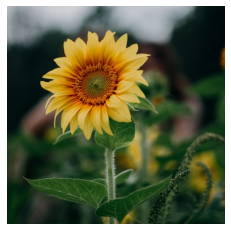

In [73]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

image = None # TO-BE-COMPLETED
image = sk.io.imread("sample.jpeg")
plt.imshow(image)

plt.axis("off")
plt.show()

In [22]:
# Define any symmetric kernel of size (105, 105)

kernel_symmetric = None # TO-BE-COMPLETED

In [23]:
# Define any asymmetric kernel of size (105, 105)

kernel_asymmetric = None # TO-BE-COMPLETED

In [24]:
# Filter the image with the symmetric kernel using the correlation function
    
filtered_image_symmetric = None # TO-BE-COMPLETED
filtered_image_asymmetric = None # TO-BE-COMPLETED

In [25]:
# Display the images side by side (with proper labeling, which is which)

### **Answer to Task 2.1** <br>

### Write your answer here. Compare the outputs.

Now, to *convolve* an ```image``` with a ```kernel``` all we need to do is call the ```signal.convolve``` function from the ```scipy``` library.

```
filtered_image = signal.convolve(image, kernel, mode='same', method='auto')```

The parameters work the same way as the ```signal.correlate```function.

In [26]:
# Filter the image with the asymmetric kernel using the convolution function

filtered_image_symmetric = None # TO-BE-COMPLETED
filtered_image_asymmetric = None # TO-BE-COMPLETED

### **Answer to Task 2.2** <br>

### Write your answer here. Compare the outputs.

## **Task 3: Edge Pair Detector** <br>
### Try to come up with two 3 x 3 filter kernels which are able to detect ***only the parallel pair of edges*** in the following image<br>

![](https://drive.google.com/uc?export=view&id=1a1CXbuC8A2FbyFvZovJMXERUijpatecU)

[The image can be downloaded from here: https://drive.google.com/file/d/1a1CXbuC8A2FbyFvZovJMXERUijpatecU/view?usp=sharing]

*Hint: No mathematical derivation is necessary. Just try devising the kernels using the same intuitions used behind the horizontal and vertical edge detector kernels. Coming up with a filter kernel means to determine the 9 filter coefficients of the 3x3 filer kernel.*

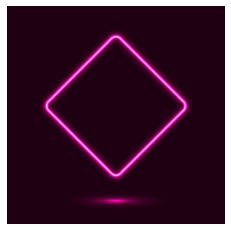

In [75]:
# Download the image from the drive link above and upload it to your current working directory in colab. Then load the image

image = None # TO-BE-COMPLETED
image = sk.io.imread("diamond2.jpg")
plt.imshow(image)

plt.axis("off")
plt.show()

In [150]:
# define the 2 custom kernels by replacing the "?"s with your values and uncomment the next few lines of code in this cell

kernel_1 = np.array([[-4, -2, 0], # TO-BE-COMPLETED
                    [-2, 0, 2], # TO-BE-COMPLETED
                    [0, 2, 4]]) # TO-BE-COMPLETED

kernel_2 = np.array([[0, -2, -4], # TO-BE-COMPLETED
                    [2, 0, -2], # TO-BE-COMPLETED
                    [4, 2, 0]]) # TO-BE-COMPLETED

(-0.5, 625.5, 625.5, -0.5)

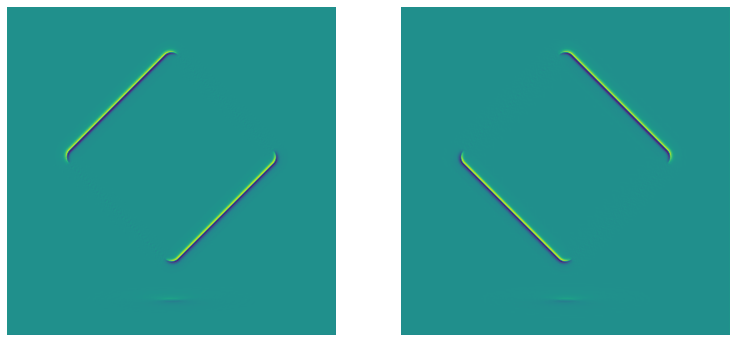

In [163]:
# detect the 2 parallel pair of edges and plot them side by side in a 1x2 grid subplot

# detect the first pair using image filtering with kernel_1
kernel_1 = np.array([[-4, -2, 0], # TO-BE-COMPLETED
                    [-2, 0, 2], # TO-BE-COMPLETED
                    [0, 2, 4]]) # TO-BE-COMPLETED

kernel_2 = np.array([[0, -2, -4], # TO-BE-COMPLETED
                    [2, 0, -2], # TO-BE-COMPLETED
                    [4, 2, 0]]) # TO-BE-COMPLETED

first_pair_detected = None # TO-BE-COMPLETED
image = image/255
#image = color.rgb2gray(image)
#err: 'the input array must have size 3 along `channel_axis`, got (626, 626)'
if image.shape[-1] == 3:
    image = color.rgb2gray(image)

first_pair_detected = signal.correlate(image, kernel_1, mode = 'same', method = 'auto')

# detect the second pair using image filtering with kernel_2

second_pair_detected = None # TO-BE-COMPLETED
second_pair_detected = signal.correlate(image, kernel_2, mode = 'same', method = 'auto')

# plot the two filtered images side by side

# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
plt.figure(figsize= (20,10))
plt.subplot(1,3,2)
plt.imshow(first_pair_detected)
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(second_pair_detected)
plt.axis("off")

### **Answer to Task 3** <br>

### Write your answer here. Which filters you came up with and why? How did you choose the coefficients? Are your kernels unique or there can be other kernels which can accomplish the same task?


## **Task 4: Image Denoising** <br>
### Take something.jpg image and corrupt it with *gaussian noise* of 0 mean and 0.2 variance. Denoise the image using:

1.   Total Variation Denoising (TVD)
2.   Bilateral Filtering (BF)

Feel free to experiment with the different filter parameters and try to come up with a cleaner image. Fianlly, comapre the MSE between the denoised images and the original uncorrupted image.

something.jpg can be downloaded from here: https://drive.google.com/file/d/1KgoZJDsTIW_NMh8LJ5oUneAQkIQsfzKT/view?usp=sharing


In [30]:
# Download the image from the drive link above and upload it to your current working directory in colab
# Then load the image "something.jpg"

image = None # TO-BE-COMPLETED

In [31]:
# corrupt the original image

image_noisy = None # TO-BE-COMPLETED

In [32]:
# import the bilateral filter

# from skimage.restoration import None # TO-BE-COMPLETED

# import the total variation denoising filter

# from skimage.restoration import None # TO-BE-COMPLETED

In [33]:
# clean the image using TVD

image_denoised_tvd = None # TO-BE-COMPLETED

In [34]:
# clean the image using BF

image_denoised_bf = None # TO-BE-COMPLETED

In [35]:
# plot image, image_denoised_tvd & image_denoised_bf side by side in a 1x3 grid subplot

 # TO-BE-COMPLETED
 # TO-BE-COMPLETED
 # TO-BE-COMPLETED ....

In [36]:
# compute the MSE

mse_tvd = None # TO-BE-COMPLETED
mse_bf = None # TO-BE-COMPLETED

### **Answer to Task 4** <br>

### Write your answer here. Briefly explain your findings both qualitatively (which one looks better) and quantitatively (which one has a better MSE). Which parameters did you tweak? How did that impact the end result?

## **The END**